# DP1 STAR PHOTOMETRY

In this notebook we are looking at the different aspect of the photometry of DP1, particularly on stars. The catalogs used in this notebook are directly retrieved from the Rubin Science Platform with the HAT system. We took our interest on the ECDFS and the Euclid Calibration regions. We will looking at the magnitude & error distribution in each filters, at different bin in SNR (Signal to Noise Ratio). We are considering source with extendedness = 0 in all filters to be stars, and those with extendedness = 1 to be galaxies.

**Overview of the ECDFS study:**
 - **Color-magnitude diagram** of stars, considering different bins of mag/errmag/SNR.
 - **Color-color diagram** of all sources / only stars, considering different bins of mag/errmag/SNR.
 - **Error distributions** of stars
 - **Property distributions** derived with the Ivezic et al. method

In [30]:
### Libraries ###
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(),"../")))

from src import photometry_plots as pp; reload(pp)
# %matplotlib widget
%matplotlib inline

In [31]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# ECDFS

## Color-magnitude and color-color diagrams

All sources

In [32]:
dp1_ECDFS = pd.read_csv(f"{base_dir}/data/DP1_ECDFS_photometry.csv")
dp1_ECDFS

,objectId,coord_ra,coord_dec,ebv,u_cModelMag,u_cModelMagErr,g_cModelMag,g_cModelMagErr,r_cModelMag,r_cModelMagErr,i_cModelMag,i_cModelMagErr,z_cModelMag,z_cModelMagErr,y_cModelMag,y_cModelMagErr,refExtendedness,g_psfMag,g_psfMagErr
0,609780902427367286,52.640189,-28.593683,0.008793,NaN,NaN,25.598400,0.865465,23.147100,0.084984,21.869200,0.028661,NaN,NaN,NaN,NaN,1.0,25.768700,0.869467
1,609780902427367296,52.703724,-28.592246,0.008917,NaN,NaN,23.680500,0.104268,22.572500,0.044972,21.699600,0.016905,21.340700,0.039593,NaN,NaN,1.0,24.327200,0.110770
2,609780902427367268,52.678693,-28.593094,0.008962,NaN,NaN,23.024099,0.052504,22.347601,0.042550,22.116899,0.033271,22.201900,0.204481,NaN,NaN,1.0,23.643299,0.055475
3,609780902427367336,52.697868,-28.589952,0.008918,23.373800,0.315337,24.011200,0.092970,24.076401,0.102733,23.067801,0.055470,22.988899,0.133557,NaN,NaN,1.0,24.191601,0.093210
4,609780902427367320,52.690968,-28.592232,0.008946,NaN,NaN,23.435600,0.065231,23.151899,0.068609,22.673800,0.041350,22.732800,0.150058,NaN,NaN,1.0,23.762501,0.065269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195230,611254522886499009,52.872274,-28.173224,0.009321,25.883699,0.533915,24.715599,0.024462,24.607000,0.027638,24.494200,0.043776,24.619900,0.114453,24.053600,0.409386,1.0,24.817301,0.024402
195231,611254522886499008,52.870371,-28.180464,0.009379,25.868999,0.538733,25.627199,0.052479,25.223700,0.046094,24.540100,0.042971,24.567499,0.099025,24.492399,0.593760,1.0,25.681700,0.052801
195232,611254522886499007,52.862616,-28.170736,0.009244,24.921700,0.243163,24.687000,0.026694,24.468399,0.027778,24.285400,0.040386,24.100700,0.088066,23.323601,0.268302,1.0,24.959400,0.027852
195233,611254522886499006,52.863998,-28.173702,0.009288,26.255501,0.922656,24.545799,0.026446,24.331800,0.027963,23.787800,0.029468,23.329700,0.044337,22.987301,0.198409,1.0,24.989100,0.028354


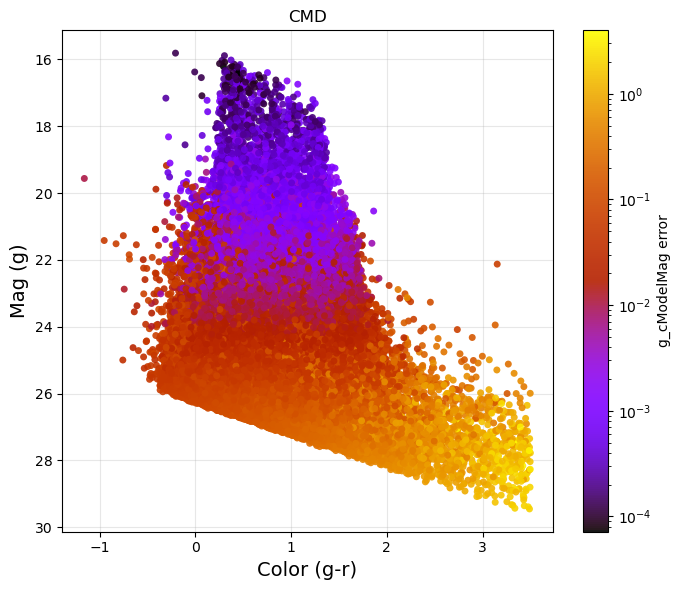

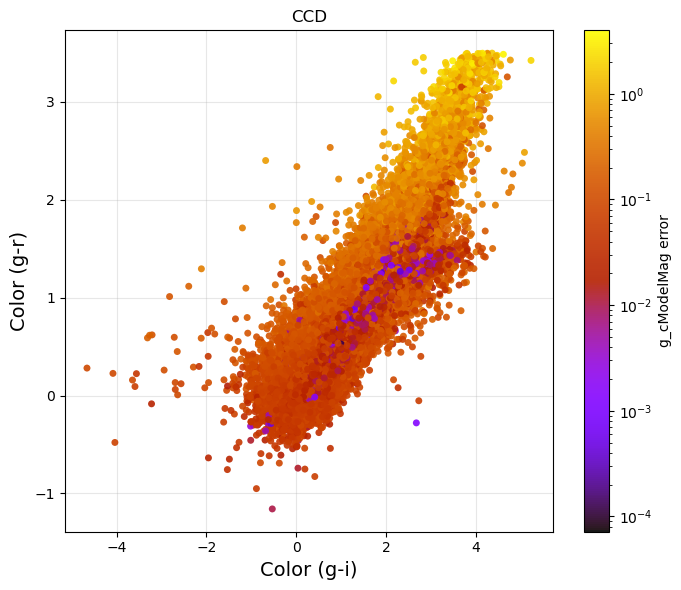

In [33]:
mask = (((dp1_ECDFS['g_cModelMag'] - dp1_ECDFS['r_cModelMag']) > -2) & ((dp1_ECDFS['g_cModelMag'] - dp1_ECDFS['r_cModelMag']) < 3.5) 
        & ((dp1_ECDFS['g_cModelMag'] - dp1_ECDFS['i_cModelMag']) > -5))
dp1_ECDFS_masked = dp1_ECDFS[mask]

pp.plot_cmd(dp1_ECDFS_masked['g_cModelMag'] - dp1_ECDFS_masked['r_cModelMag'], dp1_ECDFS_masked['g_cModelMag'], color_value=dp1_ECDFS_masked['g_cModelMagErr'],
                             xlabel='Color (g-r)', ylabel='Mag (g)', cbar_label='g_cModelMag error', log_cbar=True, title= "CMD")

pp.plot_ccd(dp1_ECDFS_masked['g_cModelMag'] - dp1_ECDFS_masked['i_cModelMag'], dp1_ECDFS_masked['g_cModelMag'] - dp1_ECDFS_masked['r_cModelMag'], color_value=dp1_ECDFS_masked['g_cModelMagErr'],
                             xlabel='Color (g-i)', ylabel='Color (g-r)', cbar_label='g_cModelMag error', log_cbar=True, title= "CCD")

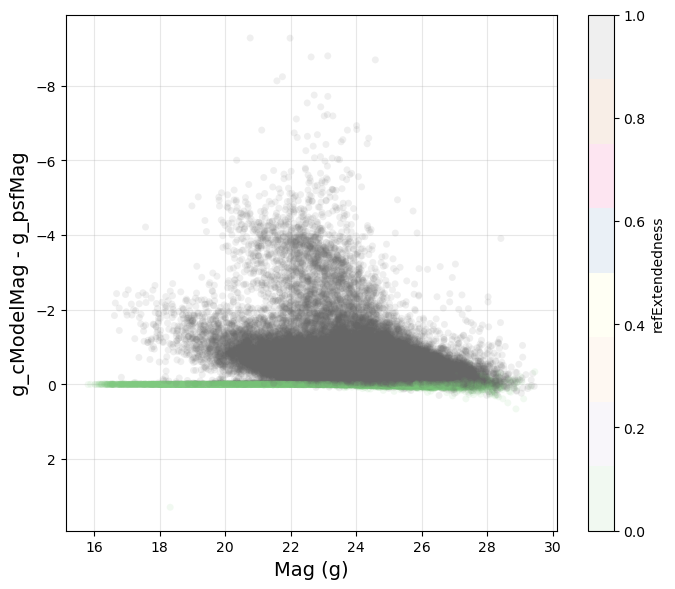

In [34]:
# plt.figure()
# plt.scatter(dp1_ECDFS_masked['g_cModelMag'], dp1_ECDFS_masked['g_psfMag']-dp1_ECDFS_masked['g_cModelMag'], s=10)
# plt.show()

pp.plot_cmd(dp1_ECDFS_masked['g_cModelMag'], dp1_ECDFS_masked['g_cModelMag'] - dp1_ECDFS_masked['g_psfMag'], color_value=dp1_ECDFS_masked['refExtendedness'],
                             xlabel='Mag (g)', ylabel='g_cModelMag - g_psfMag', cbar_label='refExtendedness', log_cbar=False, title= None,cmap="Accent", alpha=0.1)

Stars

CMD: g-magnitudes ranges from 16 to 28 with errors ranging from 0.0001 to 1 in increasing order of magnitudes

In [35]:
dp1_ECDFS_star = pd.read_csv(f"{base_dir}/data/DP1_ECDFS_star_photometry.csv")

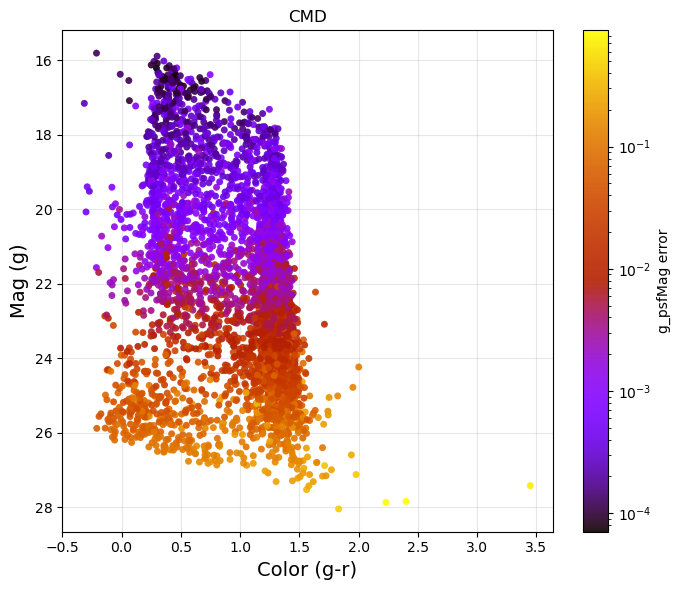

In [36]:
pp.plot_cmd(dp1_ECDFS_star['g_psfMag'] - dp1_ECDFS_star['r_psfMag'], dp1_ECDFS_star['g_psfMag'], color_value=dp1_ECDFS_star['g_psfMagErr'],
                             xlabel='Color (g-r)', ylabel='Mag (g)', cbar_label='g_psfMag error', log_cbar=True, title= "CMD")

CCD: (g-i) vs (g-r) following a slope of ~0.75 with a dispersion increasing with the errors.

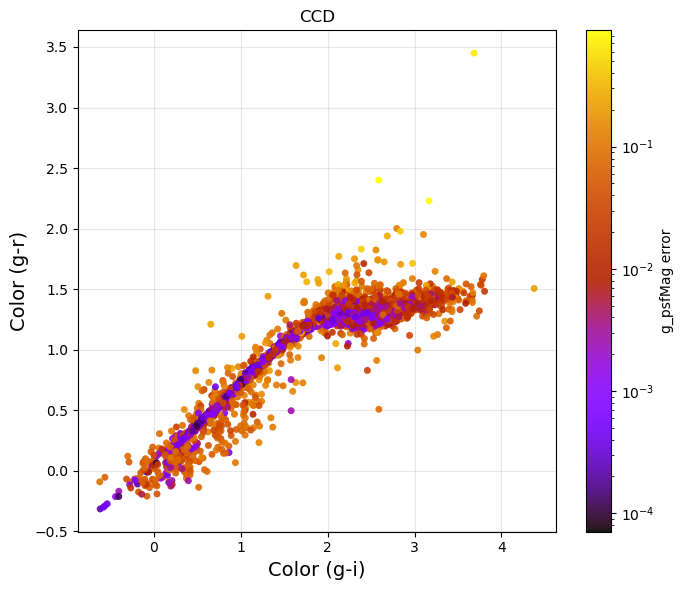

In [37]:
pp.plot_ccd(dp1_ECDFS_star['g_psfMag'] - dp1_ECDFS_star['i_psfMag'], dp1_ECDFS_star['g_psfMag'] - dp1_ECDFS_star['r_psfMag'], color_value=dp1_ECDFS_star['g_psfMagErr'],
                             xlabel='Color (g-i)', ylabel='Color (g-r)', cbar_label='g_psfMag error', log_cbar=True, title= "CCD")

## Error distribution

Error Histograms: Much more dispersion for u and y filters, then z, then g, r and i

All sources

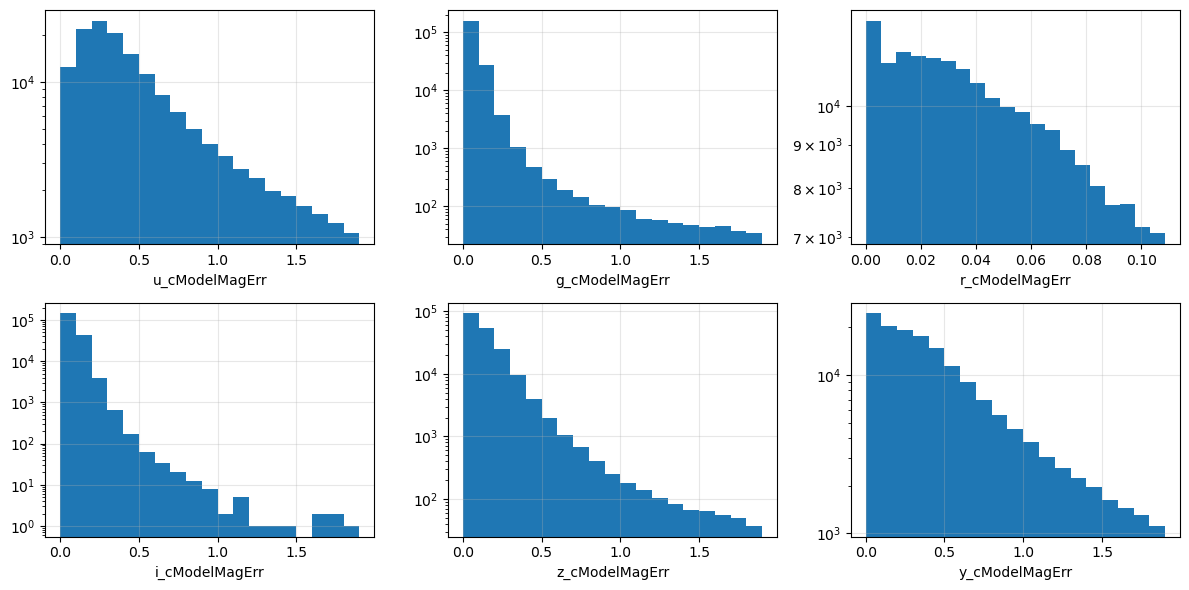

In [ ]:
dp1_ECDFS_masked = dp1_ECDFS[dp1_ECDFS['refExtendedness']==0]
pp.plot_histograms(dp1_ECDFS, ['u_cModelMagErr', 'g_cModelMagErr', 'r_cModelMagErr', 'i_cModelMagErr', 'z_cModelMagErr', 'y_cModelMagErr'],
                    max_bins=2, bins=20,log=True)


Stars

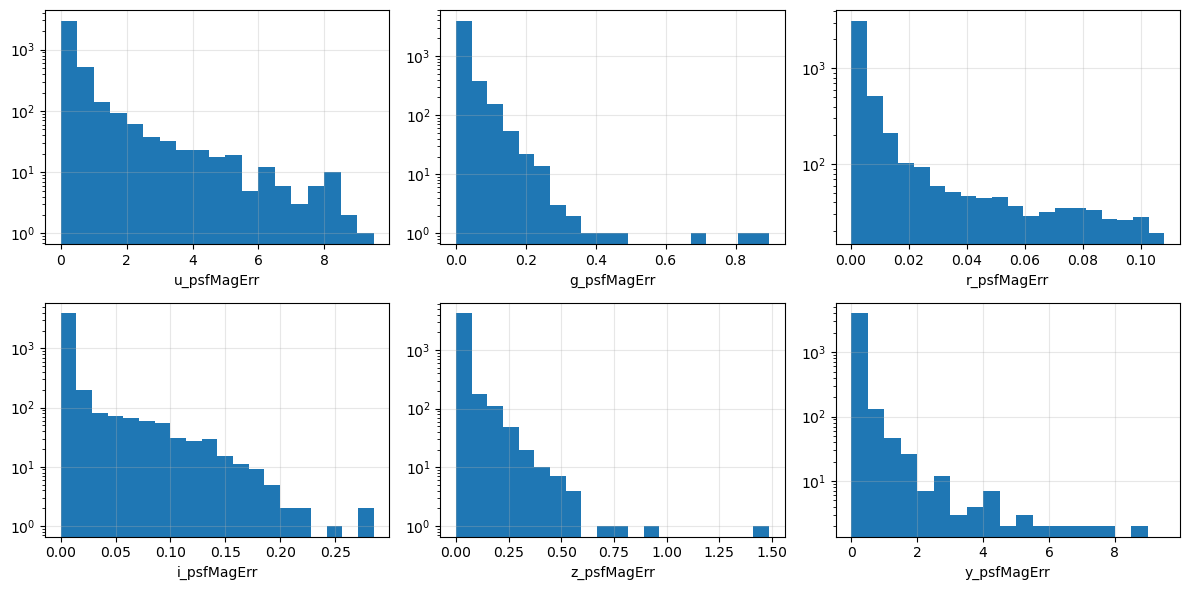

In [10]:
pp.plot_histograms(dp1_ECDFS_star, ['u_psfMagErr', 'g_psfMagErr', 'r_psfMagErr', 'i_psfMagErr', 'z_psfMagErr', 'y_psfMagErr'],
                    max_bins=10, bins=20,log=True)


## Property distributions
 - Fe/H
 - Teff
 - log(g)

Teff

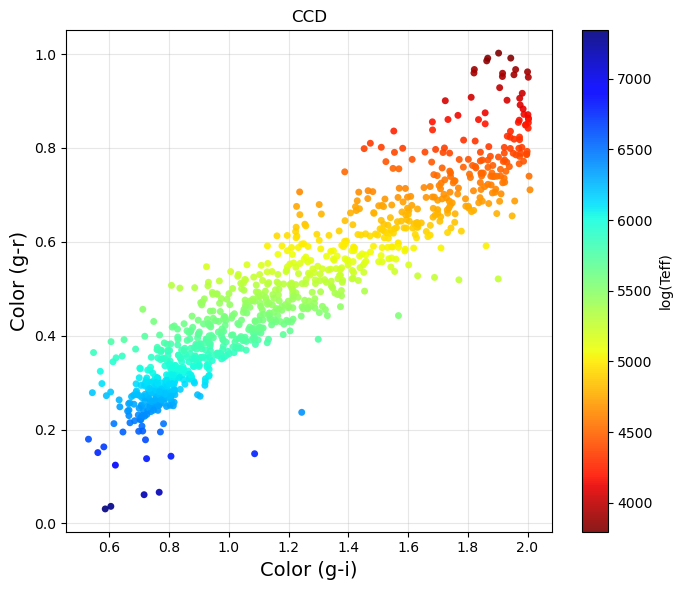

In [12]:
pp.plot_ccd(dp1_ECDFS_star['u_psfMag'] - dp1_ECDFS_star['g_psfMag'], dp1_ECDFS_star['g_psfMag'] - dp1_ECDFS_star['r_psfMag'], 
                            color_value=10**dp1_ECDFS_star['log_teff'], xlabel='Color (g-i)', ylabel='Color (g-r)', cbar_label='log(Teff)', 
                            title= "CCD", log_cbar=False, show_nocolor_value=False, cmap='jet_r')

Fe/H

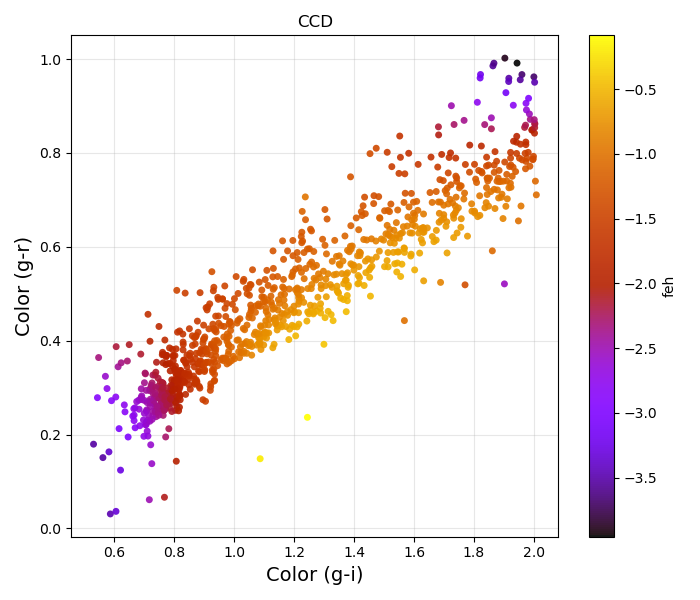

In [13]:
%matplotlib widget
pp.plot_ccd(dp1_ECDFS_star['u_psfMag'] - dp1_ECDFS_star['g_psfMag'], dp1_ECDFS_star['g_psfMag'] - dp1_ECDFS_star['r_psfMag'], color_value=dp1_ECDFS_star['feh'],
                             xlabel='Color (g-i)', ylabel='Color (g-r)', cbar_label='feh', log_cbar=False, title= "CCD", show_nocolor_value=False)

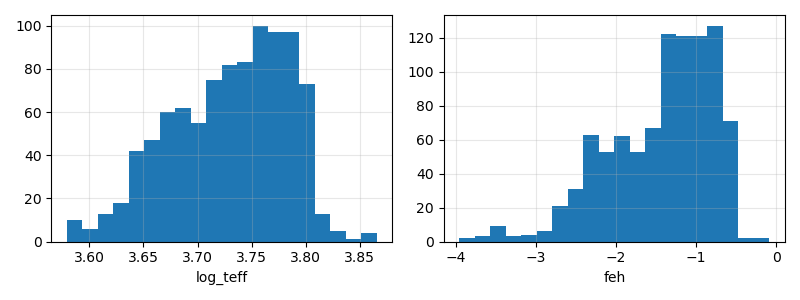

In [14]:
pp.plot_histograms(dp1_ECDFS_star, ['log_teff', 'feh'],
                    max_bins=10, bins=20)
